# Plot generation routines

In [1]:
visualization_code = ! cat '../implementation/visualization/plotting.py'
exec('\n'.join(visualization_code))

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [10, 7]

# Plots

## CartPole

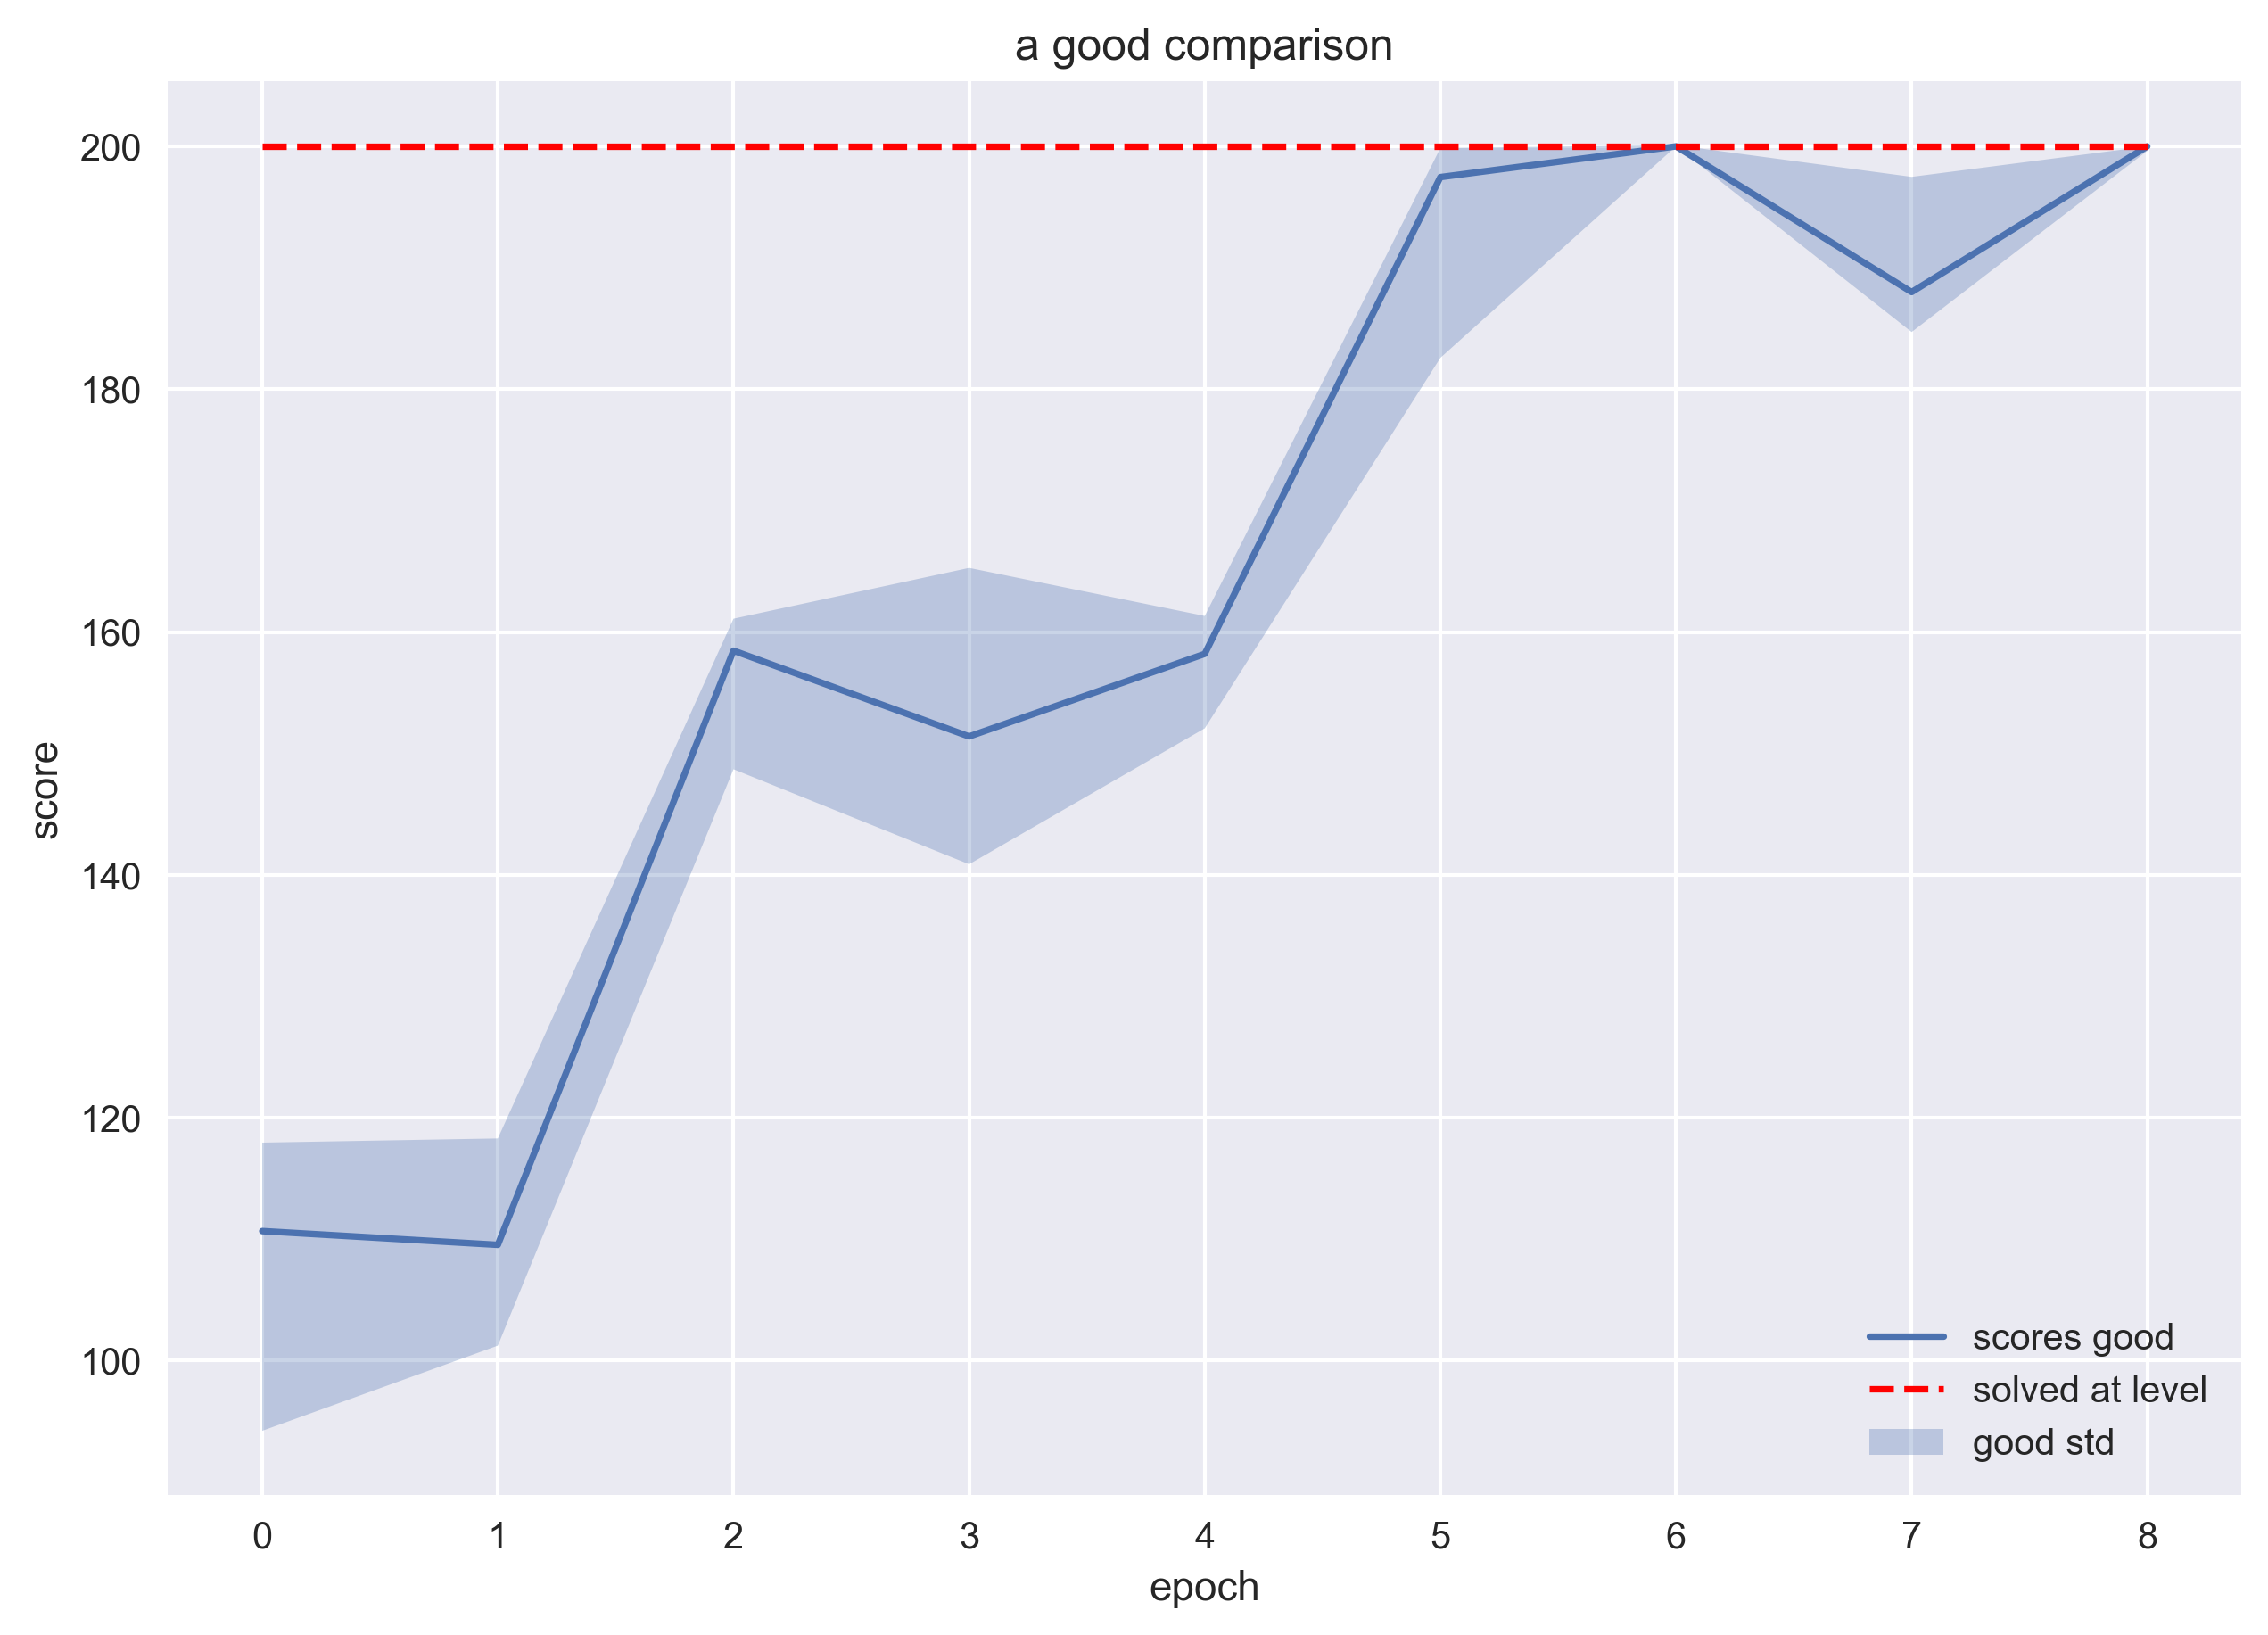

In [6]:
basePath = '/Users/mateusz/PycharmProjects/uber-rl/'
name_1 = 'experiment-2021-03-27--12-01'
legend = ['scores good', 'good std']
title = 'a good comparison'
save_path = 'cart_pole.png'

make_plots([basePath + name_1], legend, title, save_path, solved_at = 200.)

## LunarLander

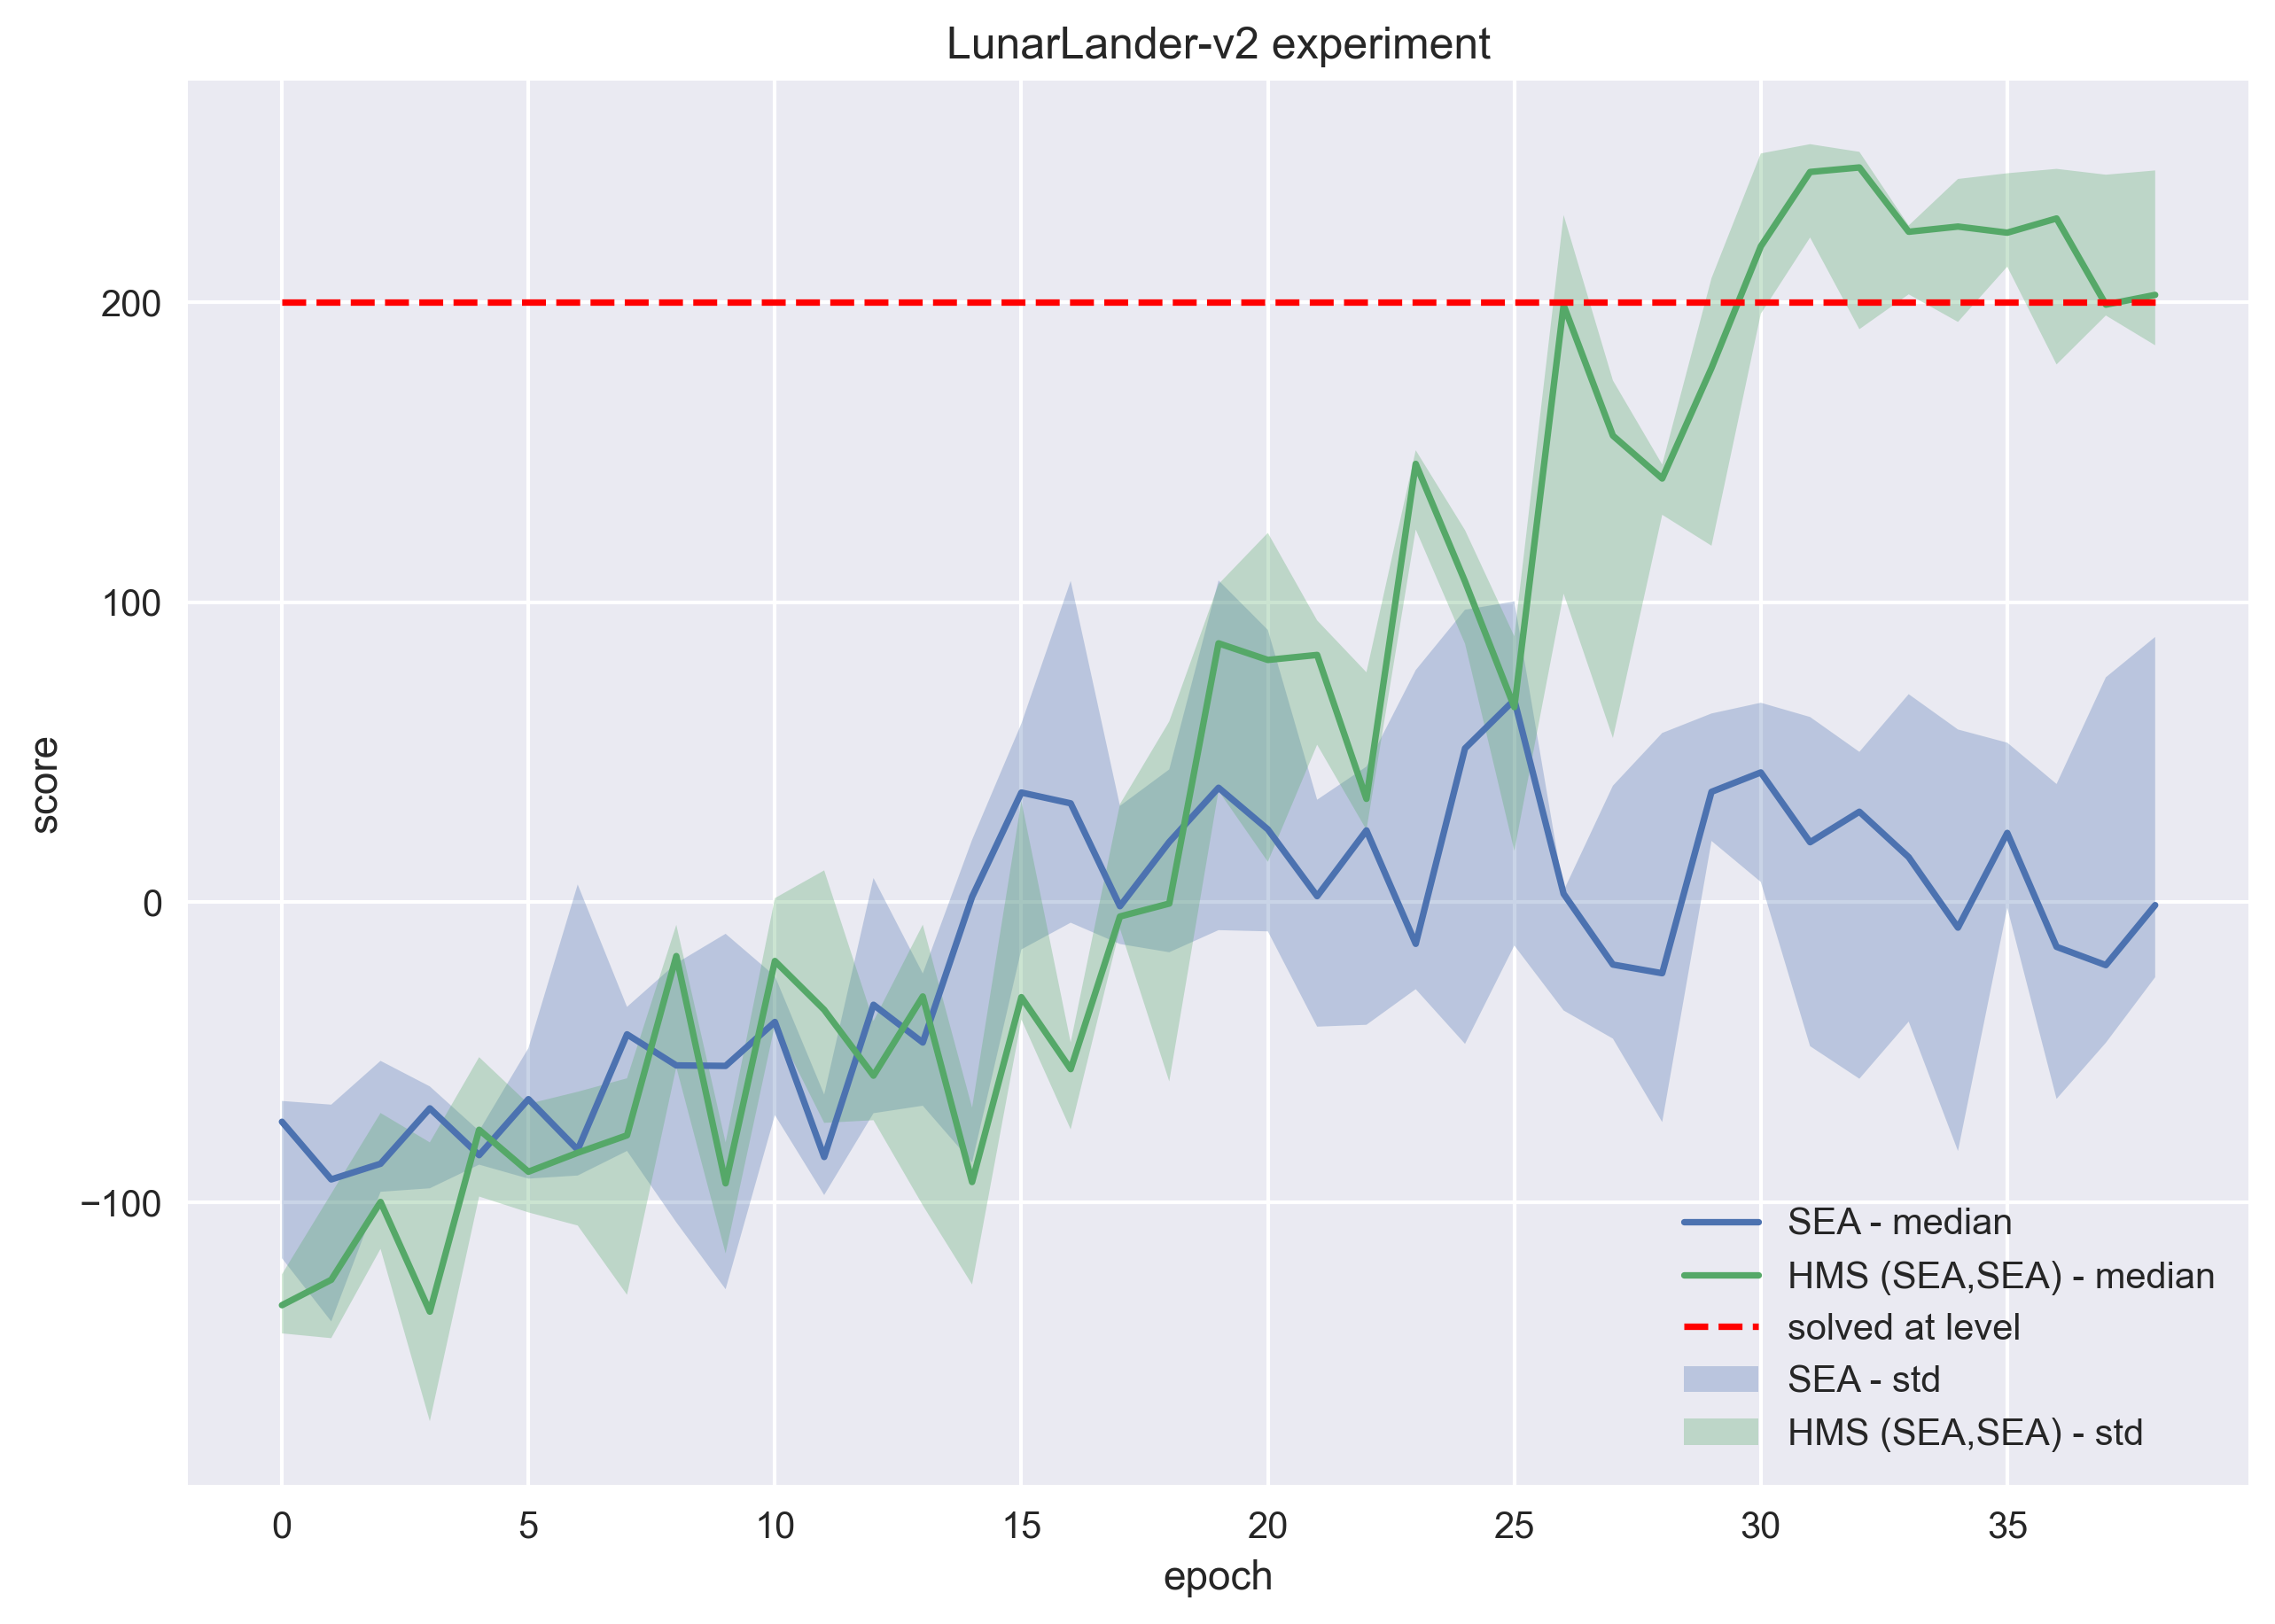

In [4]:
basePath = '/Users/mateusz/Desktop/final/'
name_1 = 'experiment-2021-03-21--16-44'
name_2 = 'experiment-2021-03-21--18-34'
legend = ['SEA - median', 'HMS (SEA,SEA) - median', 'SEA - std', 'HMS (SEA,SEA) - std']
title = 'LunarLander-v2 experiment'
save_path = 'lunar_lander.png'

make_plots([basePath + name_1, basePath + name_2], legend, title, save_path, solved_at = 200.)

## Atari Frostbite

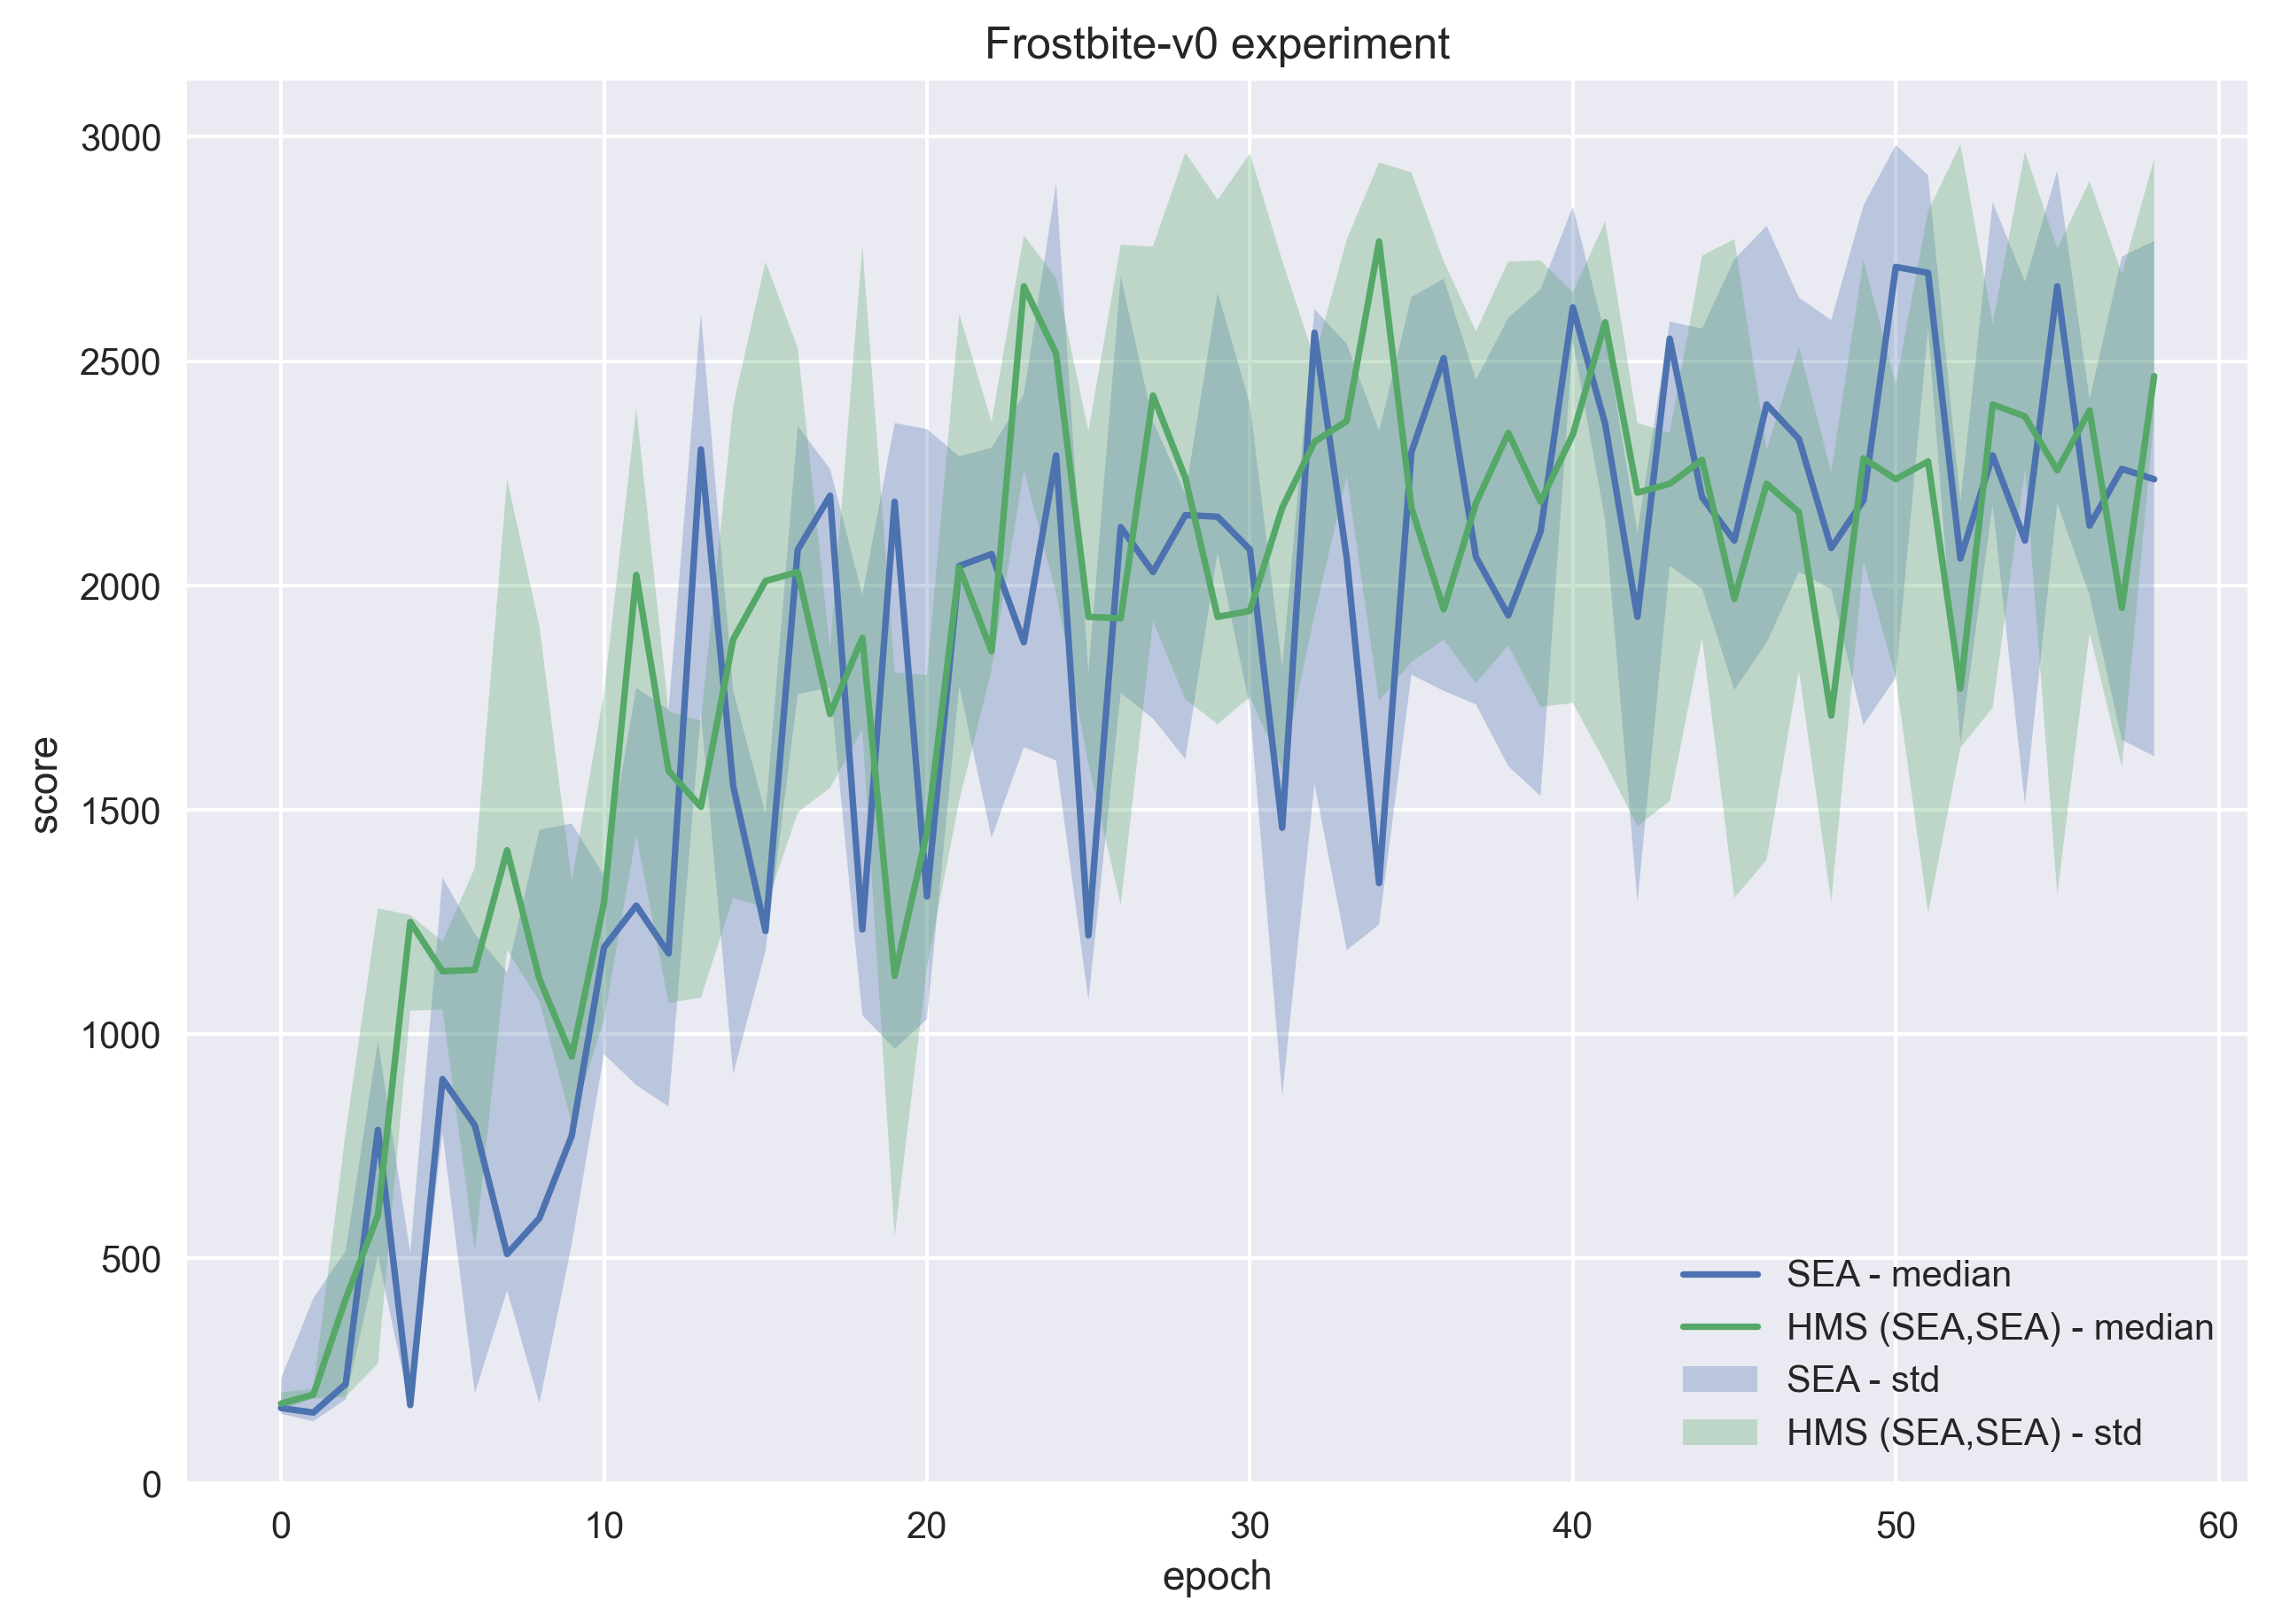

In [8]:
basePath = '/Users/mateusz/Downloads/'
name_1 = 'atari_0'
name_2 = 'atari_1'
legend = ['SEA - median', 'HMS (SEA,SEA) - median', 'SEA - std', 'HMS (SEA,SEA) - std']
title = 'Frostbite-v0 experiment'
save_path = 'atari_frostbite.png'

make_plots([basePath + name_1, basePath + name_2], legend, title, save_path)

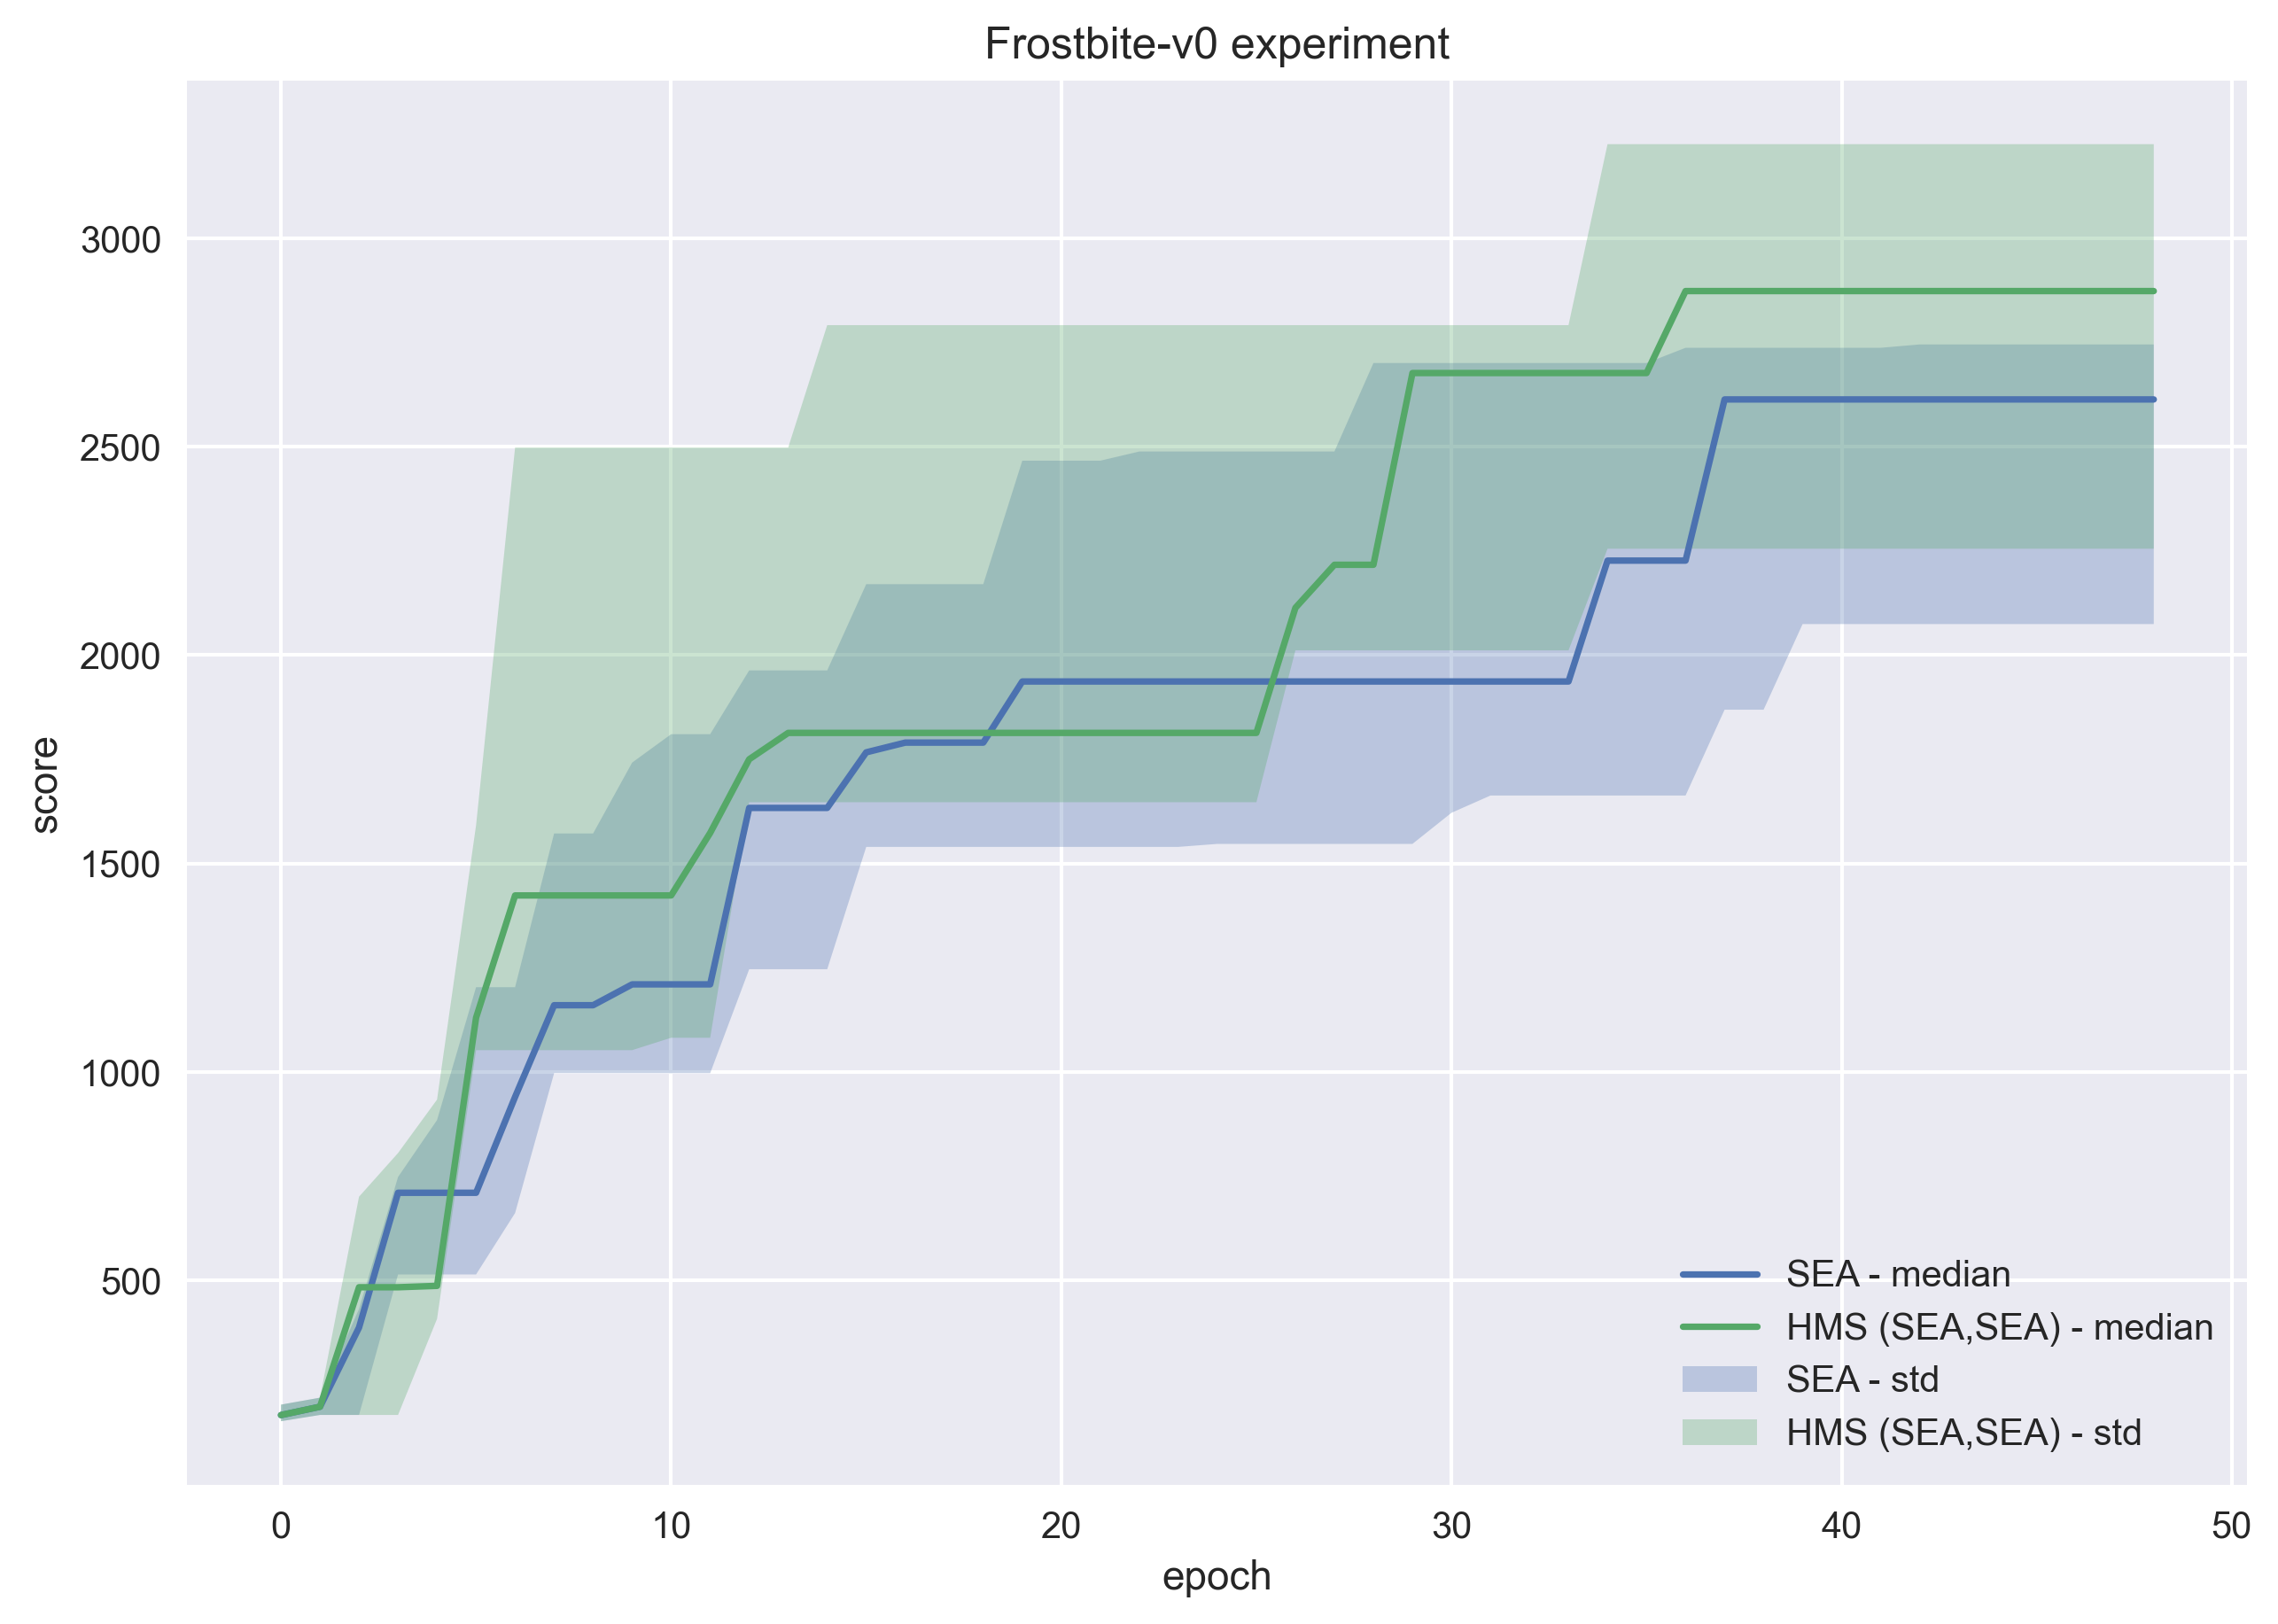

In [15]:
basePath = '/Users/mateusz/Downloads/'
name_1 = 'final_atari_0'
name_2 = 'final_atari_1'
legend = ['SEA - median', 'HMS (SEA,SEA) - median', 'SEA - std', 'HMS (SEA,SEA) - std']
title = 'Frostbite-v0 experiment'
save_path = 'atari_frostbite.png'

make_plots([basePath + name_1, basePath + name_2], legend, title, save_path, show_tops=True)